## K-Nearest Neighbours (KNN)

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [3]:
dataset = pd.read_csv('../Task5_Logistic-Regression/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print("Features (X):", X)

Features (X): [[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]


In [5]:
print("Dimension of input dataset is:",X.shape)

Dimension of input dataset is: (400, 2)


In [6]:
print("Labels (y):", y)

Labels (y): [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


### 3: Split the dataset into training and test sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
X_train

array([[    29,  75000],
       [    38,  80000],
       [    45,  26000],
       [    54, 108000],
       [    46,  23000],
       [    23,  28000],
       [    37,  75000],
       [    42,  65000],
       [    35,  71000],
       [    51, 146000],
       [    39,  96000],
       [    24,  89000],
       [    58,  95000],
       [    25,  22000],
       [    41,  59000],
       [    28,  89000],
       [    42,  80000],
       [    42, 108000],
       [    46,  96000],
       [    47, 113000],
       [    33,  28000],
       [    19,  25000],
       [    49,  89000],
       [    31,  15000],
       [    30,  79000],
       [    48, 141000],
       [    32, 117000],
       [    37,  71000],
       [    18,  86000],
       [    42,  79000],
       [    27,  84000],
       [    40,  65000],
       [    57,  74000],
       [    26,  15000],
       [    26,  80000],
       [    29,  43000],
       [    33, 149000],
       [    39,  42000],
       [    54, 104000],
       [    36,  33000],


In [9]:
X_test

array([[    46,  22000],
       [    59,  88000],
       [    28,  44000],
       [    48,  96000],
       [    29,  28000],
       [    30,  62000],
       [    47, 107000],
       [    29,  83000],
       [    40,  75000],
       [    42,  65000],
       [    35,  65000],
       [    53,  34000],
       [    23,  48000],
       [    20,  23000],
       [    30,  87000],
       [    35, 108000],
       [    52,  38000],
       [    46,  74000],
       [    39,  42000],
       [    56,  60000],
       [    22,  27000],
       [    29,  80000],
       [    47,  23000],
       [    59,  76000],
       [    19,  19000],
       [    51,  23000],
       [    42,  80000],
       [    37,  53000],
       [    55, 125000],
       [    19,  21000],
       [    46,  41000],
       [    19,  70000],
       [    36, 144000],
       [    28,  79000],
       [    40, 107000],
       [    35,  75000],
       [    37,  55000],
       [    38,  65000],
       [    26,  30000],
       [    18,  68000],


### 4: Feature Scaling


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [12]:
X_test

array([[ 0.82778356, -1.43382709],
       [ 2.10507569,  0.51377487],
       [-0.94077478, -0.78462644],
       [ 1.02429004,  0.74984783],
       [-0.84252154, -1.25677236],
       [-0.7442683 , -0.25346227],
       [ 0.9260368 ,  1.07444816],
       [-0.84252154,  0.36622926],
       [ 0.23826411,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 , -0.16493491],
       [ 1.51555624, -1.07971764],
       [-1.43204099, -0.66658995],
       [-1.72680071, -1.40431797],
       [-0.7442683 ,  0.48426575],
       [-0.2530021 ,  1.10395728],
       [ 1.417303  , -0.96168116],
       [ 0.82778356,  0.10064718],
       [ 0.14001087, -0.84364468],
       [ 1.81031597, -0.31248051],
       [-1.53029423, -1.28628149],
       [-0.84252154,  0.2777019 ],
       [ 0.9260368 , -1.40431797],
       [ 2.10507569,  0.15966542],
       [-1.82505395, -1.52235445],
       [ 1.31904976, -1.40431797],
       [ 0.43477059,  0.2777019 ],
       [-0.05649561, -0.51904435],
       [ 1.71206273,

### 5: Training the K-Nearest Neighbors Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, n_jobs=-1, weights='distance')
classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


### Predict the new data

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


### Make the confusion matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:", (cm[0][0] + cm[1][1]) / np.sum(cm))

[[68  5]
 [ 4 43]]
Accuracy: 0.925


### Helper Function

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_knn_boundary(X_scaled, y, title, sc, classifier):
    # Convert back to original scale for plotting
    X_set = sc.inverse_transform(X_scaled)
    y_set = y

    # Safe meshgrid
    X1, X2 = np.meshgrid(
        np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 1.0),
        np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 1.0)
    )

    # Predict over grid
    grid = np.c_[X1.ravel(), X2.ravel()]
    Z = classifier.predict(sc.transform(grid))
    Z = Z.reshape(X1.shape)

    # Plot decision boundary
    plt.contourf(
        X1, X2, Z,
        alpha=0.75,
        cmap=ListedColormap(('red', 'green'))
    )

    # Plot points
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0],
            X_set[y_set == j, 1],
            c=ListedColormap(('red', 'green'))(i),
            label=j
        )

    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()


### Training set results

C:\Users\HP\AppData\Local\Temp\ipykernel_16364\3479894035.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


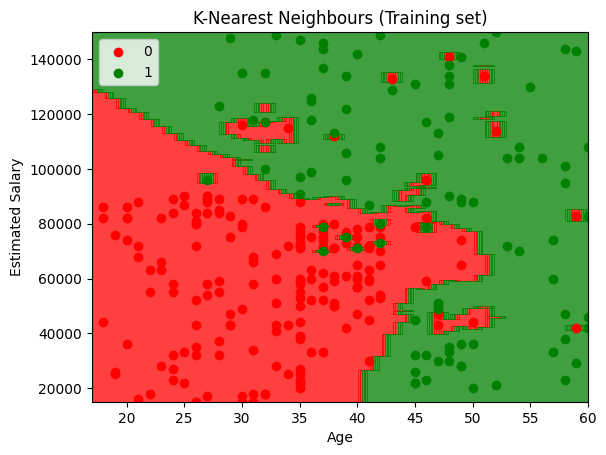

In [19]:
plot_knn_boundary(
    X_train,
    y_train,
    'K-Nearest Neighbours (Training set)',
    sc,
    classifier
)


### Test set results

C:\Users\HP\AppData\Local\Temp\ipykernel_16364\3479894035.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


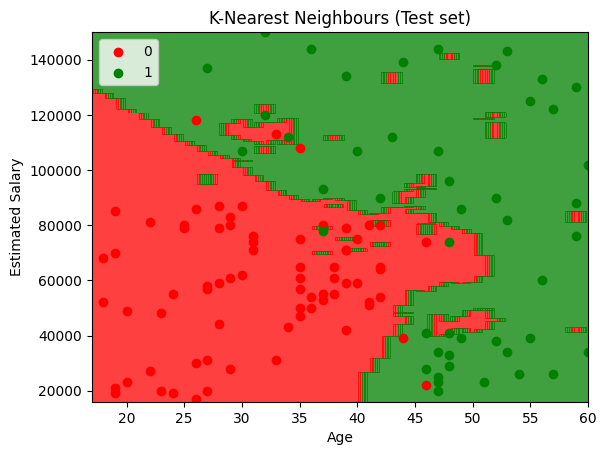

In [20]:
plot_knn_boundary(
    X_test,
    y_test,
    'K-Nearest Neighbours (Test set)',
    sc,
    classifier
)